# CMB DATA INSPECTION <br />

## 1. Introduction <br />

The Cosmic Microwave Background (CMB) is a radiation map detected in by the  

In [9]:
import numpy as np
from astropy.io import fits
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.constants import h,c,k

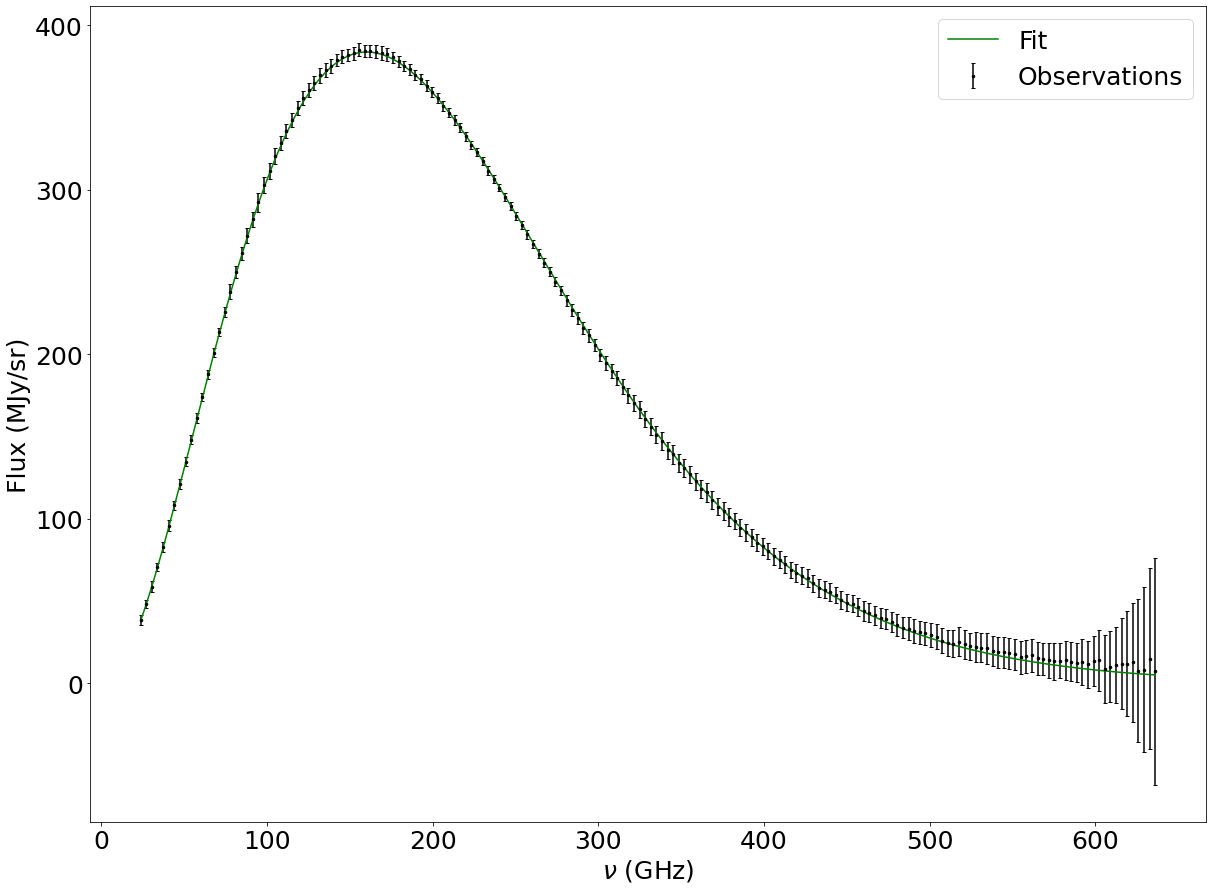

In [59]:
#IMPORTING DATA:
data = fits.open('spectra_COBE.FITS')
cube = data[1].data
minfrec = 23.80723
maxfrec = 639.527135
frec = [minfrec+(maxfrec-minfrec)*i/182 for i in range (182)]
frec = np.array(frec, dtype='float64')
frechz = [(minfrec+(maxfrec-minfrec)*i/182)*1e9 for i in range (182)]
frechz = np.array(frec, dtype='float64')
ity = []
for i in range (len(cube)):
    if cube[i][4]==1:
        ity.append(cube[i][5])

    #Mean intensity vector value for all pixels:
ity=np.matrix(ity)
itymean=ity.mean(0)
itymean=itymean.flatten().tolist()
np.shape(itymean)
itymean=itymean[0]

    #Standar deviation for all intensity values:
itystd=ity.std(0)
itystd=itystd.flatten().tolist()
np.shape(itystd)
itystd=itystd[0]



#FITTING DATA:
    #Defining the planck's function:
def pl(x,T):
    f=((2*h*((x*10**9)**3))/(c**2))*(1/(np.exp((h*(x*10**9))/(k*T))-1))*10**(20)
    f=np.array(f,dtype='float64')
    return f

    #Fit:
Temp,Tcov=curve_fit(pl,frec,itymean,p0=20,sigma=itystd,bounds=(1,30))
Terr=np.sqrt(Tcov)



#PLOTTING:
    #Sizes:
plt.rc('font', size=25)          # controls default text sizes
plt.rc('axes', titlesize=25)     # fontsize of the axes title
plt.rc('axes', labelsize=25)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=25)    # fontsize of the tick labels
plt.rc('ytick', labelsize=25)    # fontsize of the tick labels

    #Plot
plt.figure(figsize=(20,15))
plt.errorbar(frec,itymean,itystd,fmt='k.',markersize=5,capsize=2,label='Observations')
plt.plot(frec,pl(frec,Temp),'g-',label='Fit')
plt.legend()
plt.ylabel(r'Flux (MJy/sr)')
plt.xlabel(r'$\nu$'+' (GHz)')
plt.savefig('ajuste.png')